In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
data = np.loadtxt('train_MNIST.csv', dtype = str, delimiter = ',')


In [2]:
y = np.asarray(data[1:, 0:1], dtype='float')
X = np.asarray(data[1:,1:], dtype='float')


def add_ones(x):
 	a, b = np.shape(x)
	c = np.ones((a , 1))   
	return np.hstack((c, x))

X = add_ones(X)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [5]:
def img(row, data):
	image = np.zeros((28,28))
	for i in range(0,28):
		for j in range(0,28):
			pix = 28*i+j
			image[i,j] = data[row, pix]
	plt.imshow(image, cmap = 'gray')
	plt.show()
	print data[row,0]

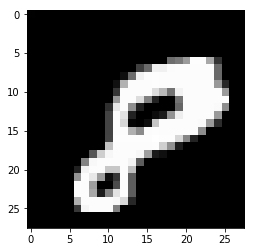

1.0


In [6]:
img(1, X_train)

In [7]:
def create_weights(data):
	a, b = np.shape(data)
	weights = np.random.rand(b,1)
	return weights

weights = create_weights(X_train)

In [8]:
def predict(data_point, weights):
	b = np.dot(data_point, weights)
	a = b>0
	return a*1

In [9]:
def one_number(labels, number):
	return (labels == number)*1

In [10]:
label_ones = one_number(y_train, 2)

In [11]:
def update(weights, data_point, labels, alpha=.1):
	predicted = predict(data_point, weights)
#for i in range(0, len(weights)):
	weight_temp = np.zeros(np.shape(weights))
	weight_temp[:,0] = alpha*(labels-predicted)*data_point
	return weight_temp+weights

In [12]:
np.shape(update(weights, X_train[3], label_ones[3]))

(785, 1)

In [13]:
def train_perceptron(data, labels, weights, alpha = .1, iterations = 100):
	for j in range(0, iterations):
		for i in range(0, len(data)):
			weights = update(weights, data[i], labels[i], alpha)
	return weights

In [14]:
weights_new = train_perceptron(X_train, label_ones, weights, alpha = .1, iterations = 50)

In [74]:
label_ones = one_number(y_train, 3)
weights_new = train_perceptron(X_train, label_ones, weights, alpha = .01, iterations =600)

In [152]:
def test_perceptron_f(data, labels, weights):
    a,b = np.shape(data)
    predicted = predict(data, weights)
    correct = (predicted==labels)*1==1
    true_pos = np.sum((labels==1)*(correct))
    true_neg = np.sum((labels==0)*(correct))
    total_pos = np.sum(labels)
    total_neg = a-total_pos
    tp_p = true_pos/float(np.sum(labels))
    tn_p = true_neg/float(a- np.sum(labels))
    return true_pos, true_neg, tp_p, tn_p, total_pos, total_neg
    
a,b,c,d,e,f = test_perceptron_f(X_train, label_ones, weights_new)

In [153]:
import matplotlib.pyplot as plt

In [155]:
print c, d

0.732718894009 0.990175252257


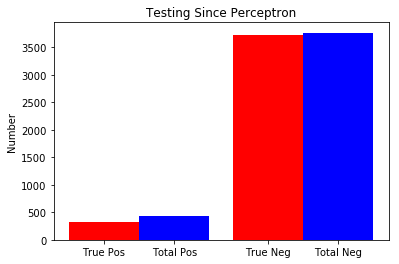

In [154]:

width = 0.3

p1 = plt.bar((1,1.7), (a,b), width, color = 'red')
p1 = plt.bar((1.3,2), (e, f), width, color = 'blue')
plt.ylabel('Number')
plt.title('Testing Since Perceptron')
plt.xticks((1,1.3, 1.7, 2), ('True Pos','Total Pos','True Neg', 'Total Neg'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [76]:

for i in range(0,10):
	num = i
	label_ones = one_number(y_train, num)
	weights_new = train_perceptron(X_train, label_ones, weights, alpha = .1, iterations =5)
	label_test = one_number(y_test, num)
	a = test_perceptron(X_test, label_test, weights_new)

(785, 1)
(785, 1)
(785, 1)
(785, 1)
(785, 1)
(785, 1)
(785, 1)
(785, 1)
(785, 1)
(785, 1)


In [78]:
def all_numbers(data,labels):
	c,d = np.shape(data)
	w = create_weights(data)
	weights = []
	for i in range(0,  len(np.unique(labels))):
		z = one_number(labels, i)
		a = train_perceptron(data, z, w, .1, 4)
		weights.append(a[:,0])
	return np.asarray(weights)

In [79]:
w = all_numbers(X_train, y_train)

In [80]:
print np.shape(w)

(10, 785)


In [133]:
def one_all(data, weights):
	a = np.dot(data,np.transpose(weights))
	b = len(np.shape(data))
	if b == 1:
		return np.argmax(a)
	return np.argmax(a, axis=1)


def test_all(data, labels, weights):
	a, b = np.shape(labels)
	predicted = one_all(data, weights)
	correct = predicted == labels[:,0]
	accuracy = np.sum(correct)/float(a)
	return accuracy

print test_all(X_train, y_train, w)



0.84380952381


In [134]:
a = len(np.unique(y_train))

In [135]:
print a

10
